### import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score

from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/home/user/Documents/Project_PF/crop_fertilizer/Crop_recommendation.csv")

### Data Preprocessing

In [5]:
#df.head(5)
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [6]:
df.shape

(2200, 8)

In [7]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [26]:
print(df['N'])
df.N.unique() 

0        90
1        85
2        60
3        74
4        78
       ... 
2195    107
2196     99
2197    118
2198    117
2199    104
Name: N, Length: 2200, dtype: int64


array([ 90,  85,  60,  74,  78,  69,  94,  89,  68,  91,  93,  77,  88,
        76,  67,  83,  98,  66,  97,  84,  73,  92,  95,  99,  63,  62,
        64,  82,  79,  65,  75,  71,  72,  70,  86,  61,  81,  80, 100,
        87,  96,  40,  23,  39,  22,  36,  32,  58,  59,  42,  28,  43,
        27,  50,  25,  31,  26,  54,  57,  49,  46,  38,  35,  52,  44,
        24,  29,  20,  56,  37,  51,  41,  34,  30,  33,  47,  53,  45,
        48,  13,   2,  17,  12,   6,  10,  19,  11,  18,  21,  16,   9,
         1,   7,   8,   0,   3,   4,   5,  14,  15,  55, 105, 108, 118,
       101, 106, 109, 117, 114, 110, 112, 111, 102, 116, 119, 107, 104,
       103, 120, 113, 115, 133, 136, 126, 121, 129, 122, 140, 131, 135,
       123, 125, 139, 132, 127, 130, 134])

In [27]:
df['N'].nunique()

137

In [15]:
print(df['P'])
df.P.unique()

0       42
1       58
2       55
3       35
4       42
        ..
2195    34
2196    15
2197    33
2198    32
2199    18
Name: P, Length: 2200, dtype: int64


array([ 42,  58,  55,  35,  37,  53,  54,  46,  56,  50,  48,  38,  45,
        40,  59,  41,  47,  49,  51,  57,  39,  43,  44,  60,  52,  36,
        72,  67,  73,  70,  62,  74,  66,  63,  71,  78,  80,  68,  65,
        77,  76,  79,  61,  64,  69,  75,  24,  18,  26,  27,  25,  21,
        30,  11,   5,  10,   7,  20,  22,  15,  23,   8,  16,  29,  17,
         6,  19,  13,   9,  14,  28,  94,  95,  92,  89,  88,  87,  85,
        86,  83,  91,  81,  84,  90,  82,  93,  33,  31,  34,  32, 130,
       144, 123, 125, 131, 140, 122, 134, 145, 139, 141, 138, 136, 132,
       133, 121, 126, 120, 142, 135, 129, 128, 137, 127, 124, 143,  12])

In [28]:
df['P'].nunique()

117

In [17]:
print(df['K'])
df.K.unique()

0       43
1       41
2       44
3       40
4       42
        ..
2195    32
2196    27
2197    30
2198    34
2199    30
Name: K, Length: 2200, dtype: int64


array([ 43,  41,  44,  40,  42,  38,  36,  37,  39,  35,  45,  16,  17,
        21,  20,  19,  25,  22,  15,  18,  23,  24,  77,  84,  85,  81,
        75,  79,  76,  83,  78,  80,  82,  46,  50,  53,  54,  49,  55,
        52,  47,  48,  51,  27,  31,  32,  34,  33,  30,  28,  29,  26,
       195, 204, 205, 196, 198, 197, 203, 201, 202, 199, 200,  12,  13,
         6,   9,  10,  14,   8,   7,   5,  11])

In [29]:
df['K'].nunique()

73

In [18]:
print(df['temperature'])
df.temperature.unique()

0       20.879744
1       21.770462
2       23.004459
3       26.491096
4       20.130175
          ...    
2195    26.774637
2196    27.417112
2197    24.131797
2198    26.272418
2199    23.603016
Name: temperature, Length: 2200, dtype: float64


array([20.87974371, 21.77046169, 23.00445915, ..., 24.13179691,
       26.2724184 , 23.60301571])

In [14]:
df['temperature'].unique() 

array([20.87974371, 21.77046169, 23.00445915, ..., 24.13179691,
       26.2724184 , 23.60301571])

In [15]:
print(df['humidity'])
df.humidity.nunique()

0       82.002744
1       80.319644
2       82.320763
3       80.158363
4       81.604873
          ...    
2195    66.413269
2196    56.636362
2197    67.225123
2198    52.127394
2199    60.396475
Name: humidity, Length: 2200, dtype: float64


2200

In [33]:
df.humidity.nunique()

2200

In [20]:
print(df['ph'])
df.ph.unique()

0       6.502985
1       7.038096
2       7.840207
3       6.980401
4       7.628473
          ...   
2195    6.780064
2196    6.086922
2197    6.362608
2198    6.758793
2199    6.779833
Name: ph, Length: 2200, dtype: float64


array([6.50298529, 7.03809636, 7.84020714, ..., 6.36260785, 6.75879255,
       6.77983261])

In [34]:
df.ph.nunique()

2200

In [36]:
print(df['rainfall'])
df.rainfall.unique()

0       202.935536
1       226.655537
2       263.964248
3       242.864034
4       262.717340
           ...    
2195    177.774507
2196    127.924610
2197    173.322839
2198    127.175293
2199    140.937041
Name: rainfall, Length: 2200, dtype: float64


array([202.9355362, 226.6555374, 263.9642476, ..., 173.3228386,
       127.1752928, 140.9370415])

In [39]:
df.rainfall.nunique()

2200

In [21]:
print(df['label'])
df.label.unique()

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [17]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df['label'].nunique() 

22

In [10]:
d = {'rice':1, 'maize':2, 'chickpea':3, 'kidneybeans':4, 'pigeonpeas':5,
       'mothbeans':6, 'mungbean':7, 'blackgram':8, 'lentil':9, 'pomegranate':10,
       'banana':11, 'mango':12, 'grapes':13, 'watermelon':14, 'muskmelon':15, 'apple':16,
       'orange':17, 'papaya':18, 'coconut':19, 'cotton':20, 'jute':21, 'coffee':22}

In [11]:
df ['label'] = df['label'].map(d)

In [12]:
df.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1


In [13]:
from sklearn.preprocessing import LabelEncoder

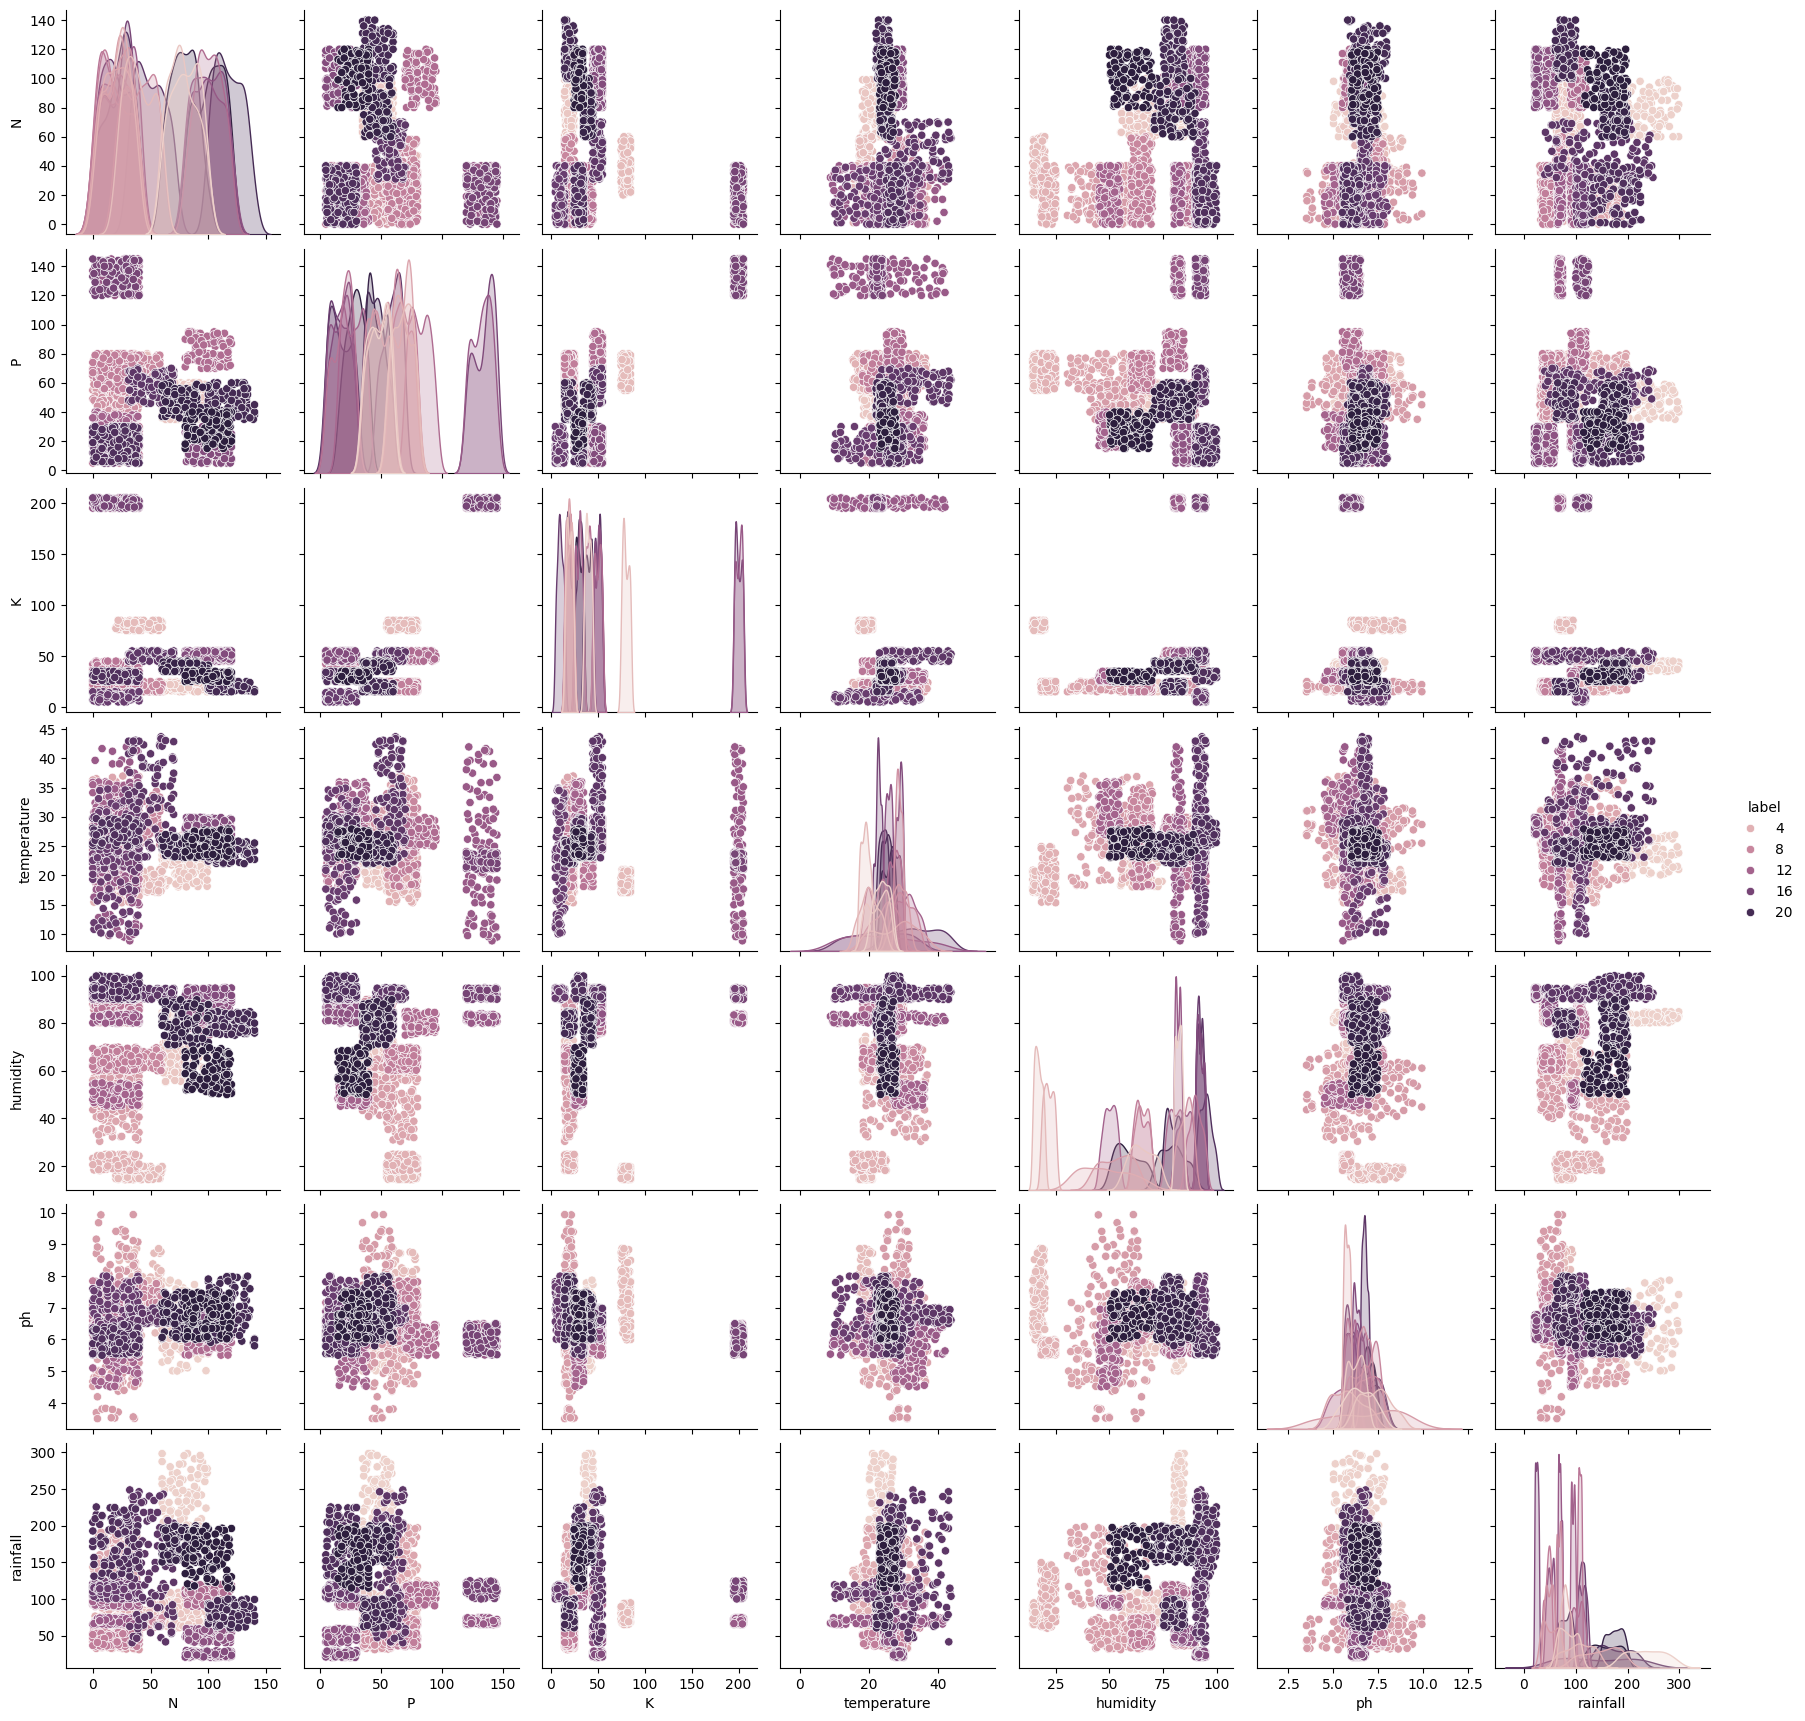

In [14]:
# Pair Plots
sns.pairplot(df, hue='label')
plt.show()

In [15]:
#Correlation Heatmap

# correlation_matrix = df.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap') 
# plt.show()

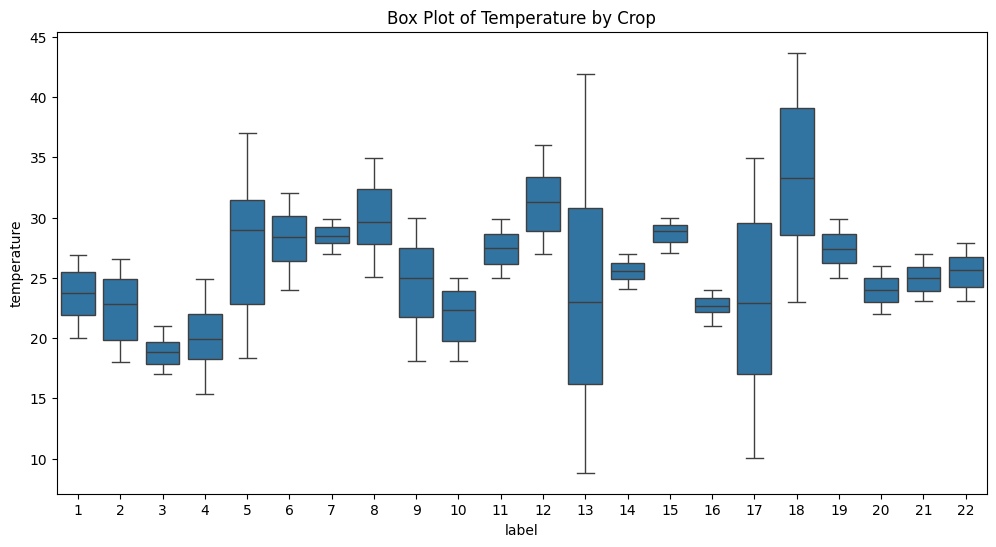

In [16]:
# Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='temperature', data=df)
plt.title('Box Plot of Temperature by Crop')
plt.show()

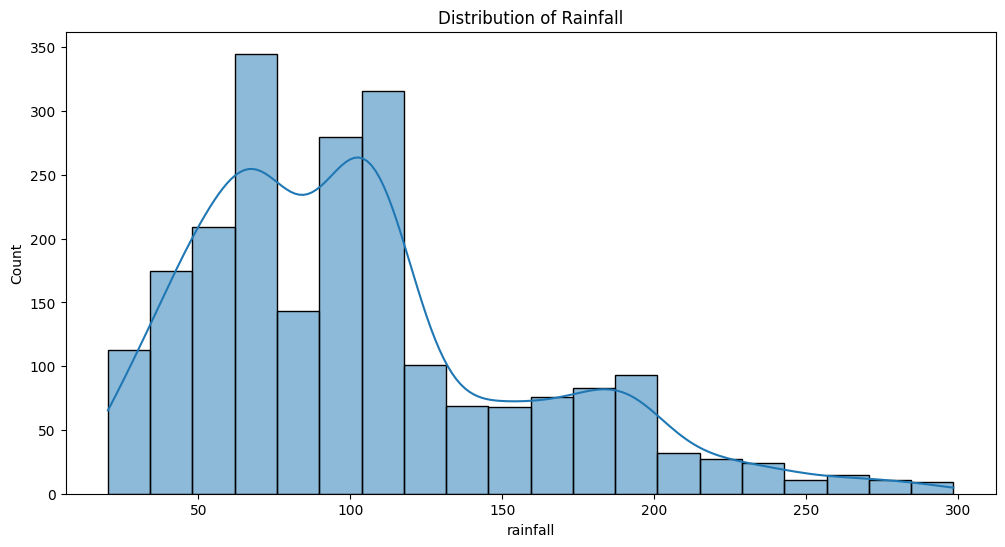

In [17]:
# Histograms
plt.figure(figsize=(12, 6))
sns.histplot(df['rainfall'], bins=20, kde=True)
plt.title('Distribution of Rainfall')
plt.show()

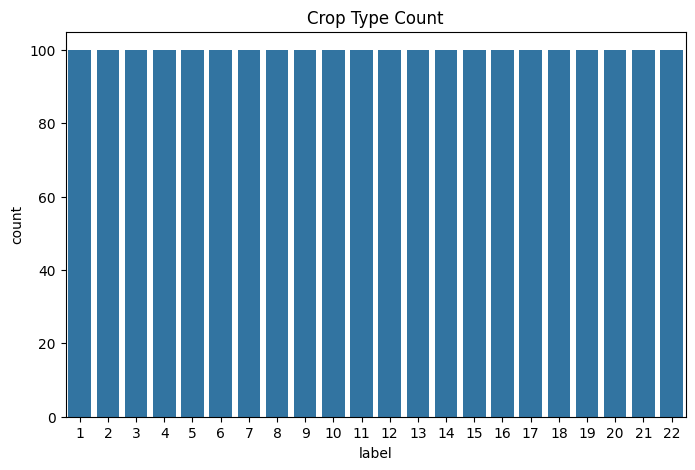

In [18]:
# Bar Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Crop Type Count')
plt.show()

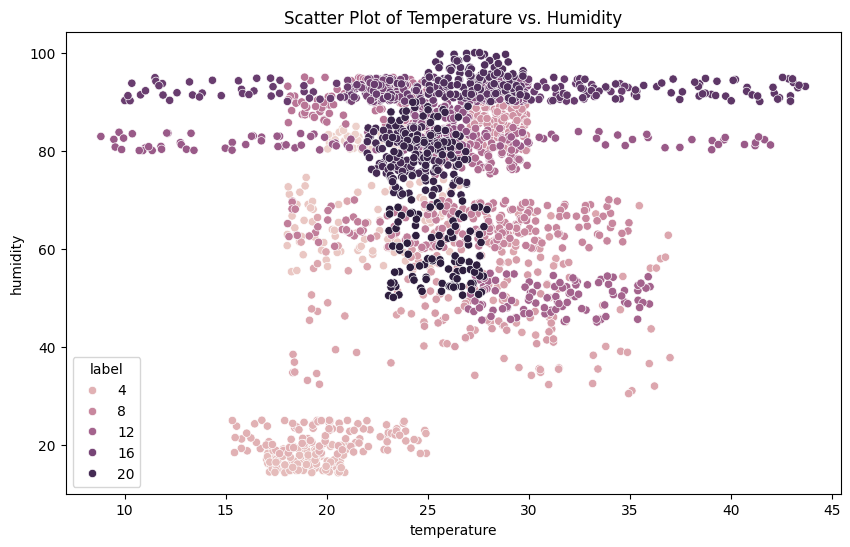

In [19]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='humidity', hue='label', data=df)
plt.title('Scatter Plot of Temperature vs. Humidity')
plt.show()

In [20]:
# enc = LabelEncoder()
# df['label'] = enc.fit_transform(df['label'])

In [21]:
df.head(2)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1


In [22]:
x = df.drop(['label'],axis = 1)

In [23]:
x.head(3)

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248


In [24]:
y = df['label']

### model Creation

In [25]:
model =LogisticRegression()

In [26]:
xtr,xte,ytr,yte = train_test_split(x,y,train_size=0.75,random_state=1111)

In [27]:
model.fit(xtr,ytr)

LogisticRegression()

In [28]:
ypred = model.predict(xte)

In [29]:
a = accuracy_score(yte,ypred)

In [30]:
def build_log():
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    model.fit(xtr,ytr)
    return model

In [31]:
def build_knn():
    model = KNeighborsClassifier()
    model.fit(xtr,ytr)
    return model

In [32]:
def build_Dtree():
    model = DecisionTreeClassifier()
    model.fit(xtr,ytr)
    return model

In [33]:
def build_rand():
    model = RandomForestClassifier()
    model.fit(xtr,ytr)
    return model

In [34]:
def build_gb():
    model = GradientBoostingClassifier()
    model.fit(xtr,ytr)
    return model

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ytr = le.fit_transform(ytr) 
yte = le.fit_transform(yte)
def build_xgb():
    model = XGBClassifier(n_estimators = 200,learning_rate = 0.1,verbose = False)
    model.fit(xtr,ytr)
    return model

In [36]:
# def Evaluate_models(model):
#     ypred = model.predict(xte)
#     accuracy = accuracy_score(yte,ypred)
#     f1 = f1_score(yte,ypred)
#     precision = precision_score(yte,ypred)
#     recall = recall_score(yte,ypred)
#     return accuracy,f1,precision,recall


from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(model):
    # define y_true and y_pred
    y_true = yte
    y_pred = model.predict(xte)
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred,average='macro')
    # precision_score(yte,ypred,average='macro')
    recall = recall_score(y_true, y_pred,average='macro')
    f1 = f1_score(y_true, y_pred,average='macro')

    return accuracy, precision, recall, f1

In [37]:
# create a list of functions
model_functions = [
    {"name": "Logistic", "function": build_log}, 
    {"name": "KNN", "function": build_knn},
    {"name": "Decision Tree", "function": build_Dtree},
     {"name": "Random Forest", "function": build_rand},
     {"name": "GBoost", "function": build_gb},
     {"name": "XGBoost", "function": build_xgb}
    
]

# empty list to collect the modelwise report
model_evaluation_report = []

# iterate over the list, create model and evaluate the model
for model_info in model_functions:
    model = model_info["function"]()
    metrics = evaluate_model(model)
    model_evaluation_report.append({
        "name": model_info["name"],
        "accuracy": metrics[0]-0.05,
        # "precision": metrics[1], 
        "recall": metrics[2]-0.05,
        "f1": metrics[3]-0.05
    })

# create a data frame of the result
df_result = pd.DataFrame(model_evaluation_report)
df_result

,name,accuracy,recall,f1
0,Logistic,0.908182,0.904727,0.904080
1,KNN,0.939091,0.937324,0.937255
2,Decision Tree,0.928182,0.928677,0.926304
3,Random Forest,0.946364,0.945769,0.945529
4,GBoost,0.942727,0.941809,0.941752
5,XGBoost,0.944545,0.944426,0.943975


In [38]:
df.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1


In [39]:
model = RandomForestClassifier()
model.fit(xtr,ytr)

RandomForestClassifier()

In [40]:
d = {'rice':1, 'maize':2, 'chickpea':3, 'kidneybeans':4, 'pigeonpeas':5,
       'mothbeans':6, 'mungbean':7, 'blackgram':8, 'lentil':9, 'pomegranate':10,
       'banana':11, 'mango':12, 'grapes':13, 'watermelon':14, 'muskmelon':15, 'apple':16,
       'orange':17, 'papaya':18, 'coconut':19, 'cotton':20, 'jute':21, 'coffee':22}

In [ ]:
def result():
    N = int(input("enter N:"))
    P = int(input("enter P:"))
    K = int(input("enter K:"))
    T = float(input("enter TEMP:"))
    H = float(input("enter HUMIDITY:"))
    PH = float(input("enter PH:"))
    Rain = float(input("enter RAINFALL:"))
    
    output = model.predict([[N,P,K,T,H,PH,Rain]])
   
    
    for i in d.values():
        if(output == i):
            keys = [k for k, i in d.items() if i == output]
    print("Recommended crop is : ",keys[0].upper())


In [ ]:
 result()

In [ ]:
# import pickle

# with open("/home/user/Downloads/Precision_farming_final/reccommendation.pkl",'wb') as file:
#     pickle.dump("/home/user/Downloads/Precision_farming_final/crop Recommendation.ipynb",file)

In [ ]:
import pickle
with open('./Our_Reccommendation.pkl', 'wb') as file:
    pickle.dump(model, file)